In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Traing Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path, "y_train.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where(subject_train.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined", "Train", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Train", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Train", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the training data")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Test Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path, "y_test.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

    sub_idxs = np.where(subject_test.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        if not os.path.exists(os.path.join("Combined", "Test", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Test", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Test", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the testing data")
print("Done Combining the data")

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Done Combining the training data
Done Combining the testing data
Done Combining the data


In [3]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


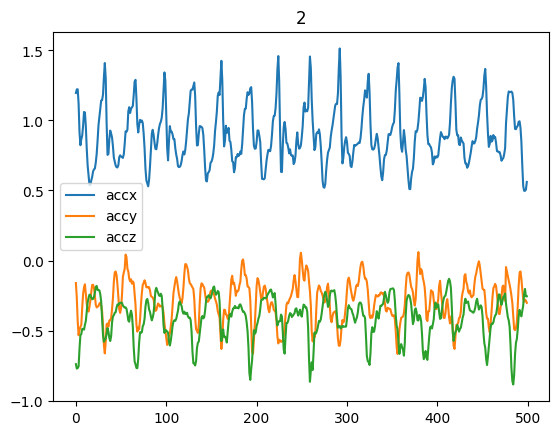

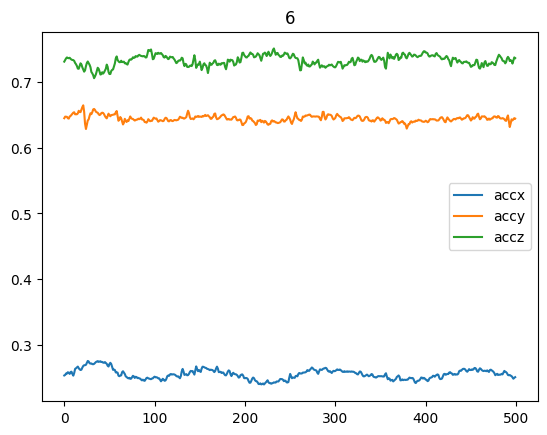

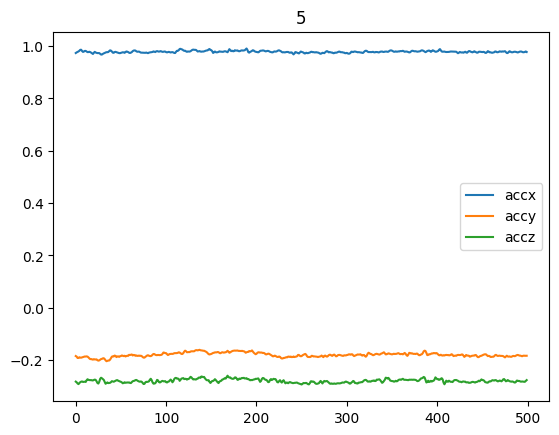

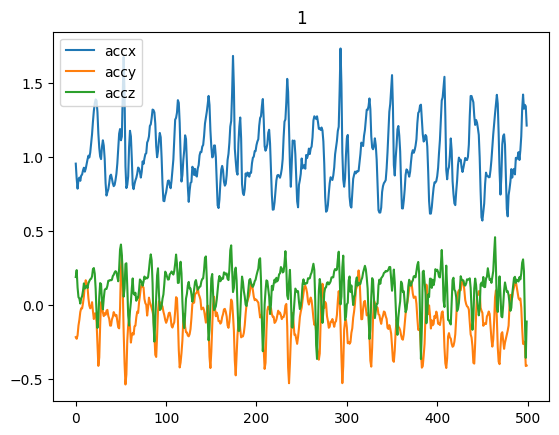

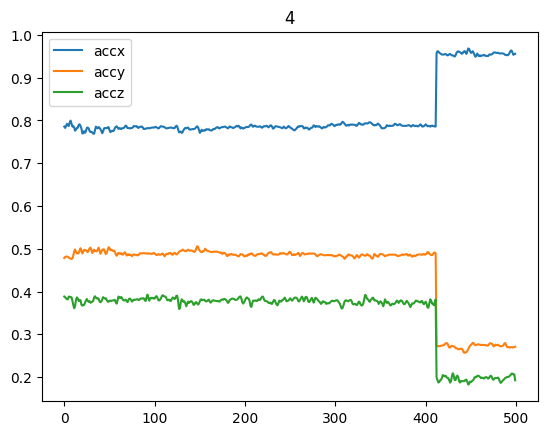

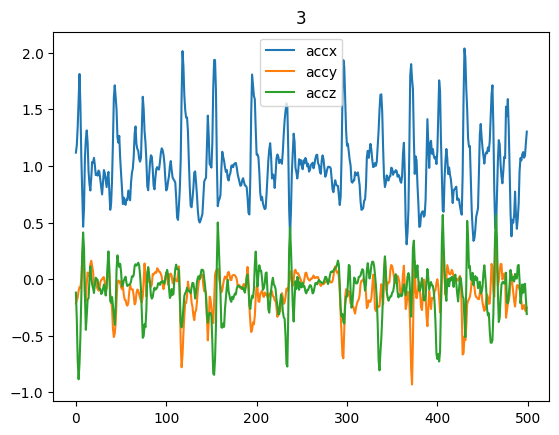

In [4]:
uniqueclass = np.unique(y_train)
d = {}
for i,j in enumerate(y_train):
  if j not in d:
    data = X_train[i]
    plt.plot(data[:,0],label="accx")
    plt.plot(data[:,1],label="accy")
    plt.plot(data[:,2],label="accz")
    plt.title(j)
    plt.legend()
    plt.show()
    d[j] = X_train

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [ ]:
    plt.plot(data[:,2],label="accz")
    plt.title(j)
    plt.legend()
    plt.show()
    d[j] = X_train

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [5]:
m = [[],[],[],[],[],[]]
for i,j in enumerate(y_train):
  c = 0
  for g in range(500):
    c += np.sqrt(np.sum(X_train[i][g]**2))
  m[j-1].append(c/500)

for i in range(6):
  print(np.mean(m[i]))


# NO it is clearly evident from linear acc data as dynamic activities have acc >1.04 while static have <1.04.


1.050682400465318
1.0448572017057092
1.0440904944801723
1.0155547656799542
1.0316474049730346
1.0068263079528097


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
print(df.shape)


(63000, 4)


In [11]:
from sklearn.preprocessing import StandardScaler
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2
s = StandardScaler()
totalaccscaled = s.fit_transform(df["totalacc"])
pca = PCA(n_components=2)
xpca = pca.fit_transform(totalaccscaled)
print(xpca.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[2.00524907 2.16039974 2.27381717 ... 0.5572244  0.53673477 0.5198036 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.